In [1]:
#lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [14]:
# TRAIN AND VALID DATA
data = pd.read_csv('data/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])

In [15]:
data.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [17]:
# Checking sum of the missing values (columns)

In [18]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [19]:
#visualize to understand better about the data

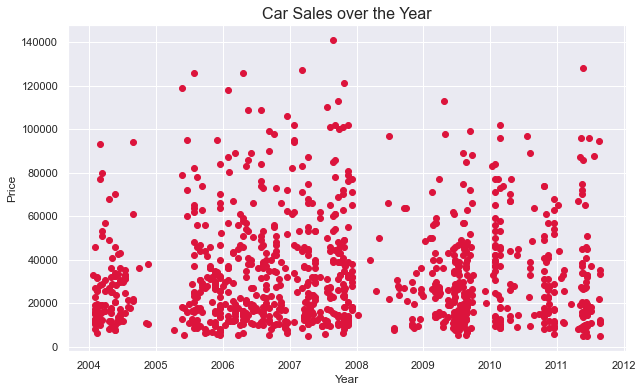

In [32]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter (data['saledate'][:1000],data['SalePrice'][:1000],c='crimson')
plt.title('Car Sales over the Year',fontsize=16)
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

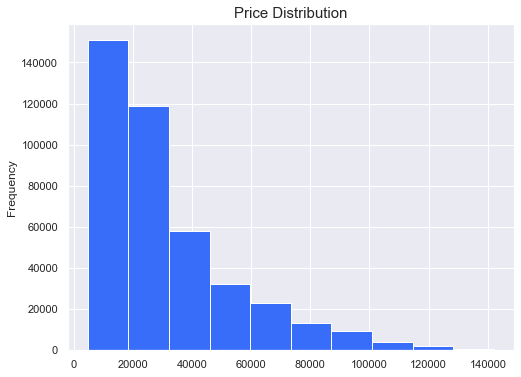

In [34]:
#Distribution of sales price
#histograms 
data['SalePrice'].plot.hist(figsize=(8,6),bins=10)
plt.title('Price Distribution',fontsize=15)
plt.show()

In [35]:
####### SALE DATE #######
data['saledate'][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [36]:
# Sorting data['saledate'] for better understanding

In [39]:
data.sort_values(by=['saledate'],ascending=True,inplace= True)

data['saledate'][:100]

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
            ...    
53101    1989-01-31
87602    1989-01-31
67034    1989-01-31
169982   1989-02-01
168804   1989-02-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [40]:
data.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115892,1453054,36000.0,1117184,3854,132,99.0,1977,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
134080,1491298,46000.0,1322436,4107,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
92294,1403411,23000.0,1184544,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31494,1263797,17000.0,1526902,6953,132,99.0,1983,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
140922,1504404,26000.0,1310407,4139,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN


In [41]:
#copying the data for avoiding future problem
df = data.copy()

In [42]:
df.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [43]:
### Making more robust datatime column for saledata

In [46]:
df['saleYear'] = df['saledate'].dt.year

df['saleMonth'] = df['saledate'].dt.month

df['saleDay'] = df['saledate'].dt.day


df['saleDayOfWeek'] = df['saledate'].dt.dayofweek

df['saleDayOfYear'] = df['saledate'].dt.dayofyear

In [47]:
df.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [49]:
#dropping saleDate column
df = df.drop('saledate',axis=1)

In [50]:
df.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416


In [51]:
## CHecking all the states
df['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [52]:
##CONVERT OBJECT TO NUMERIC

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [54]:
#Convert  string(object) dataType to pandas Category dtypes

In [56]:
# Finding all columns that has string 
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
    

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [57]:
## Converting all to category types
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [59]:
df['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [61]:
df['state'].cat.codes

205615    43
233186     8
142491     8
115536     8
92301      8
          ..
409901     4
405777     4
411889     4
411890     4
409203     4
Length: 412698, dtype: int8

In [62]:
### Missing Values

In [63]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [64]:
##### CHECKING ALL THE NUMERIC VALUES 

In [65]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [66]:
#checking numeric columns that has missing values

In [67]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [68]:
#filling numeric with median
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label +'Missing'] = pd.isnull(content)
            #filling missing with median
            df[label] = content.fillna(content.median())

In [71]:
#checking again if there is any missing numeric columns
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum()>0:
            print(label)
        else:
            print('Checked! No missing values')

Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values
Checked! No missing values


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   SalesID                          412698 non-null  int64   
 1   SalePrice                        412698 non-null  float64 
 2   MachineID                        412698 non-null  int64   
 3   ModelID                          412698 non-null  int64   
 4   datasource                       412698 non-null  int64   
 5   auctioneerID                     412698 non-null  float64 
 6   YearMade                         412698 non-null  int64   
 7   MachineHoursCurrentMeter         412698 non-null  float64 
 8   UsageBand                        73670 non-null   category
 9   fiModelDesc                      412698 non-null  category
 10  fiBaseModel                      412698 non-null  category
 11  fiSecondaryDesc                  271971 non-nul

In [74]:
#checking to see if everything is okay
df['auctioneerIDMissing'].value_counts()

False    392562
True      20136
Name: auctioneerIDMissing, dtype: int64

In [75]:
df.isna().sum()

SalesID                                 0
SalePrice                               0
MachineID                               0
ModelID                                 0
datasource                              0
auctioneerID                            0
YearMade                                0
MachineHoursCurrentMeter                0
UsageBand                          339028
fiModelDesc                             0
fiBaseModel                             0
fiSecondaryDesc                    140727
fiModelSeries                      354031
fiModelDescriptor                  337882
ProductSize                        216605
fiProductClassDesc                      0
state                                   0
ProductGroup                            0
ProductGroupDesc                        0
Drive_System                       305611
Enclosure                             334
Forks                              214983
Pad_Type                           331602
Ride_Control                      

In [76]:
######### FIlling rest of the Missing Values(Category)

In [77]:
#checking all category column

for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [78]:
#Turning category to numeric and filling all the missing values
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes + 1 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   SalesID                          412698 non-null  int64  
 1   SalePrice                        412698 non-null  float64
 2   MachineID                        412698 non-null  int64  
 3   ModelID                          412698 non-null  int64  
 4   datasource                       412698 non-null  int64  
 5   auctioneerID                     412698 non-null  float64
 6   YearMade                         412698 non-null  int64  
 7   MachineHoursCurrentMeter         412698 non-null  float64
 8   UsageBand                        412698 non-null  int8   
 9   fiModelDesc                      412698 non-null  int16  
 10  fiBaseModel                      412698 non-null  int16  
 11  fiSecondaryDesc                  412698 non-null  int16  
 1

In [80]:
#checking to see if there are any category columns
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [82]:
#checking missing values
df.isna().sum()

SalesID                            0
SalePrice                          0
MachineID                          0
ModelID                            0
datasource                         0
auctioneerID                       0
YearMade                           0
MachineHoursCurrentMeter           0
UsageBand                          0
fiModelDesc                        0
fiBaseModel                        0
fiSecondaryDesc                    0
fiModelSeries                      0
fiModelDescriptor                  0
ProductSize                        0
fiProductClassDesc                 0
state                              0
ProductGroup                       0
ProductGroupDesc                   0
Drive_System                       0
Enclosure                          0
Forks                              0
Pad_Type                           0
Ride_Control                       0
Stick                              0
Transmission                       0
Turbocharged                       0
B

In [92]:
new_data = df.iloc[:,:-2]

In [93]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   fiModelDesc               412698 non-null  int16  
 10  fiBaseModel               412698 non-null  int16  
 11  fiSecondaryDesc           412698 non-null  int16  
 12  fiModelSeries             412698 non-null  int8   
 13  fiModelDescriptor         412698 non-nu

In [94]:
new_data.to_csv('sales_clean_data.csv',index=False)

In [95]:
new_data = pd.read_csv('sales_clean_data.csv',low_memory=False)

In [96]:
new_data.head().T

,0,1,2,3,4
SalesID,1646770.0,1728883.0,1508502.0,1452578.0,1403418.0
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363.0,1523610.0,1153157.0,1544443.0,1390168.0
ModelID,8434.0,9105.0,4138.0,3854.0,7110.0
datasource,132.0,132.0,132.0,132.0,132.0
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974.0,1986.0,1972.0,1974.0,1986.0
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,0.0,0.0,0.0,0.0,0.0
fiModelDesc,4593.0,4772.0,2347.0,1767.0,744.0
